<a href="https://colab.research.google.com/github/philip324/ieor162_project/blob/master/IEOR165Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from __future__ import print_function

import pandas as pd
pd.__version__
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.svm import LinearSVC, SVC
import matplotlib.pyplot as plt

# Loading **Data**

In [0]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 5.0MB/s 


1. Use the following methods to identify the coefficients of a linear model relating wine quality to different features of the wine: (1) ordinary least squares (OLS), (2) ridge regression (RR), (3) lasso regression, (4) elastic net. Make sure to include a constant (intercept) term in your model, and choose the tuning parameters using cross-validation. You may use any programming language you would like to. For your solutions, please include (i) plots of tuning parameters versus cross-validation error, (ii) coefficients (labeled by the feature) computed by each method, (iii) the minimum cross-validation error for each method, and (iv) the source code used to generate the plots and coefficients. Some hints are below:

• a constant (intercept) term can be included in OLS by solving

In [0]:
link = 'https://drive.google.com/open?id=1JaaviN2vhUI7Kbluodo2wcUZ1bDjDVBg'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('winequality-red.csv')  
import statsmodels.formula.api as sm
winequality_red = pd.read_csv('winequality-red.csv')
winequality_red = winequality_red.drop(columns = ['Unnamed: 12','Unnamed: 13' ])
wineequality_red = winequality_red
winequality_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


NUMBER 2: The data consists of annual spending on different categories of products by each retailer, along with
corresponding data on the sales channel (Hotel/Restaurant/Cafe = 1 vs. Retail = 2) and the
region (Lisbon = 1, Oporto = 2, or Other = 3) of the retailer.

Use the following methods to construct an SVM that uses spending on different categories of
products to predict the sales channel: (1) linear SVM, (2) SVM with polynomial kernel, (3)
SVM with Gaussian kernel. Choose the tuning parameters using cross-validation. You may
use any programming language you would like to. For your solutions, please include (i) plots
of tuning parameters versus cross-validation error, (ii) coecients computed by linear SVM,
(iii) the minimum cross-validation error for each method, and (iv) the source code used to
generate the plots and coecients. For the linear SVM, relate the coecients to the features.

In [0]:
link2 = 'https://drive.google.com/open?id=1P9qLUOU5x_bzoVE7e-JrNO3p1vvMOu7U'
fluff, id = link2.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('wholesale-customers.csv')  
wholesale_customers = pd.read_csv('wholesale-customers.csv')
wholesale_customers.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


# **OLS**

In [0]:
wine_X = winequality_red.copy().drop('quality', axis = 1)
wine_Y = pd.DataFrame(winequality_red['quality'])

wine_X_OLS = wine_X.copy()
wine_X_OLS['intercept'] = np.ones(winequality_red.shape[0])

wine_OLS_coeffs = np.linalg.lstsq(wine_X_OLS, wine_Y, rcond=None)[0]
#print("OLS Coefficients: ", wine_OLS_coeffs)

In [0]:
OLS_result = pd.DataFrame( wine_OLS_coeffs, list(wine_X_OLS), columns = ["Coefficient"])
OLS_result.index.name = "Features"
OLS_result

,Coefficient
Features,
fixed acidity,0.024991
volatile acidity,-1.083590
citric acid,-0.182564
residual sugar,0.016331
chlorides,-1.874225
free sulfur dioxide,0.004361
total sulfur dioxide,-0.003265
density,-17.881164
pH,-0.413653


# **Ridge Regression**

In [0]:
# Function to compute coefficients with ridge regression given a lambda value
def ridge_compute(lambda_try, wine_X_train, wine_Y_train):
  wine_ridge = Ridge(alpha=lambda_try, fit_intercept = True, normalize= True, copy_X = True)
  fit_vals = wine_ridge.fit(wine_X_train, wine_Y_train)
  return [fit_vals.coef_, fit_vals.intercept_]

In [0]:
# Cross-validation to find ideal lambda using k-out method
n = wine_X.shape[0] # getting number of test points
z = 11 # number of test alphas
lambda_try = np.linspace(0.0, 1.0, num=z) # creating set of trial lambdas

k = 100 # leave out value
repetitions = 10 # how many times to try validating
errors = np.zeros(len(lambda_try))
for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for j in range(z): # trying each of the lambdas
    coeffs = ridge_compute(lambda_try[j], wine_X.iloc[[m for m in range(n) if m not in random_indicies]], wine_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using lambda_try[j] on wine_X, wine_Y not at chosen indicies    
    errors[j] = errors[j] + sum([(np.dot(coeffs[0], wine_X.iloc[i]) + coeffs[1] - wine_Y.iloc[i])**2 for i in random_indicies]) # find error on chosen points using above coefficients and adding to total  

min_cross_validation_error = np.argmin(errors) 
print("Minimum Cross Validation error is: ", min_cross_validation_error)
lambda_star = lambda_try[min_cross_validation_error] # choose lambda with smallest error
print("Lambda with Minimum Error is: ", lambda_star)

Minimum Cross Validation error is:  0
Lambda with Minimum Error is:  0.0


Text(0.5, 1.0, 'Ridge Regression Tuning Parameter vs Cross Validation Error')

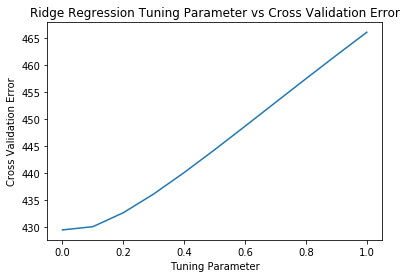

In [0]:
plt.plot(lambda_try, errors)
plt.xlabel("Tuning Parameter")
plt.ylabel("Cross Validation Error")
plt.title("Ridge Regression Tuning Parameter vs Cross Validation Error")

In [0]:
# Finding coefficients based on best lambda
wine_ridge = Ridge(alpha=lambda_star, fit_intercept = True, normalize= True, copy_X = True)
wine_ridge_coeffs = np.append(wine_ridge.fit(wine_X, wine_Y).coef_, wine_ridge.fit(wine_X, wine_Y).intercept_)

ridge_result = pd.DataFrame(wine_ridge_coeffs.T, list(wine_X) + ['intercept'], columns = ["Coefficient"])
ridge_result.index.name = "Features"
ridge_result

,Coefficient
Features,
fixed acidity,0.024991
volatile acidity,-1.083590
citric acid,-0.182564
residual sugar,0.016331
chlorides,-1.874225
free sulfur dioxide,0.004361
total sulfur dioxide,-0.003265
density,-17.881164
pH,-0.413653


# Lasso **Regression**

In [0]:
# remove warnings
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [0]:
# Function to compute coefficients with lasso regression given a lambda value
def lasso_compute(lambda_try, wine_X_train, wine_Y_train):
  wine_lasso = Lasso(alpha=lambda_try, fit_intercept = True, normalize= True, copy_X = True)
  fit_vals = wine_lasso.fit(wine_X_train, wine_Y_train)
  return [fit_vals.coef_, fit_vals.intercept_]

In [0]:
# Cross-validation to find ideal lambda using k-out method
n = wine_X.shape[0] # getting number of test points
z = 10 # number of test alphas
lambda_try = np.linspace(0.0, 1.0, num=z) # creating set of trial lambdas
k = 10 # leave out value
repetitions = 100 # how many times to try validating
errors = np.zeros(z)
for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for j in range(z): # trying each of the lambdas
    coeffs = lasso_compute(lambda_try[j], wine_X.iloc[[m for m in range(n) if m not in random_indicies]], wine_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using lambda_try[j] on wine_X, wine_Y not at chosen indicies    
    errors[j] = errors[j] + sum([(np.dot(coeffs[0], wine_X.iloc[i]) + coeffs[1] - wine_Y.iloc[i])**2 for i in random_indicies]) # find error on chosen points using above coefficients and adding to total  

min_cross_validation_error = np.argmin(errors) 
print("Minimum Cross Validation error is: ", min_cross_validation_error)
lambda_star = lambda_try[min_cross_validation_error] # choose lambda with smallest error
print("Lambda with Minimum Error is: ", lambda_star)

Minimum Cross Validation error is:  0
Lambda with Minimum Error is:  0.0


Text(0.5, 1.0, 'Lasso Regression Tuning Parameter vs Cross Validation Error')

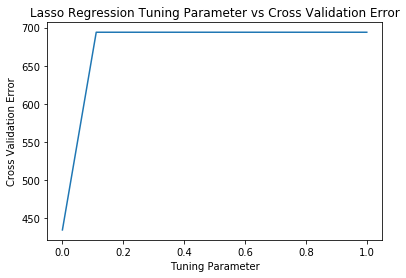

In [0]:
plt.plot(lambda_try, errors)
plt.xlabel("Tuning Parameter")
plt.ylabel("Cross Validation Error")
plt.title("Lasso Regression Tuning Parameter vs Cross Validation Error")

In [0]:
# Finding coefficients based on best lambda
wine_lasso = Lasso(alpha=lambda_star, fit_intercept = True, normalize= True, copy_X = True)
wine_lasso_coeffs = np.append(wine_lasso.fit(wine_X, wine_Y).coef_, wine_lasso.fit(wine_X, wine_Y).intercept_)

lasso_result = pd.DataFrame(wine_lasso_coeffs.T, list(wine_X) + ['intercept'], columns = ["Coefficient"])
lasso_result.index.name = "Features"
lasso_result

,Coefficient
Features,
fixed acidity,0.024991
volatile acidity,-1.083590
citric acid,-0.182564
residual sugar,0.016331
chlorides,-1.874225
free sulfur dioxide,0.004361
total sulfur dioxide,-0.003265
density,-17.881164
pH,-0.413653


# Elastic Net

In [0]:
# Use https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html to compute
# Function to compute coefficients with lasso regression given a lambda value
def elastic_compute(al, l1, wine_X_train, wine_Y_train):
  wine_elastic = ElasticNet(alpha=al, l1_ratio=l1, fit_intercept = True, normalize= True, copy_X = True)
  fit_vals = wine_elastic.fit(wine_X_train, wine_Y_train)
  return [fit_vals.coef_, fit_vals.intercept_]

In [0]:
warnings.filterwarnings("ignore", category=RuntimeWarning)
# Cross-validation to find ideal lambdas using k-out method
n = wine_X.shape[0] # getting number of test points
z1 = 5 # number of test alphas
z2 = 5

lambda_try1 = np.linspace(0.0, 1.0, num=z1) # creating set of trial lambdas
lambda_try2 = np.linspace(0.0, 1.0, num=z2) # creating set of trial lambdas

k = 10 # leave out value
repetitions = 10 # how many times to try validating
errors = [[i, j, 0] for i in lambda_try1 for j in lambda_try2]

for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for i, z in enumerate(errors):
    alpha, l1_ratio = z[0] + z[1], z[0]/(z[0] + z[1])
    coeffs = elastic_compute(alpha, l1_ratio, wine_X.iloc[[m for m in range(n) if m not in random_indicies]], wine_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using lambda_try[j] on wine_X, wine_Y not at chosen indicies    
    errors[i][2] += sum([(np.dot(coeffs[0], wine_X.iloc[i]) + coeffs[1] - wine_Y.iloc[i].values)**2 for i in random_indicies]) # find error on chosen points using above coefficients and adding to total  

sorted_error = sorted(filter(lambda x: not np.isnan(x[2]), errors), key = lambda y: y[2])
print("Minimum Cross Validation error is: ", sorted_error[0][2])
lambda1_star, lambda2_star = sorted_error[0][0], sorted_error[0][1] # choose lambdas with smallest error
print("Lambdas with Minimum Error are: ", lambda1_star, " and ", lambda2_star)

Minimum Cross Validation error is:  [68.46482396]
Lambdas with Minimum Error are:  0.0  and  0.25


Text(0.5, 0.92, 'Lasso Regression Tuning Parameter vs Cross Validation Error')

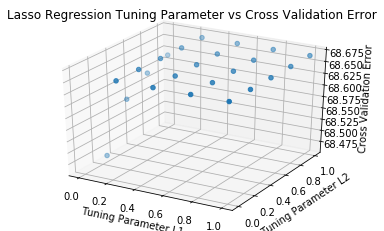

In [0]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')#Axes3D(fig)

ax.scatter(list(map(lambda x: x[0], errors)), list(map(lambda x: x[1], errors)), list(map(lambda x: x[2], errors)))

ax.set_xlabel("Tuning Parameter L1")
ax.set_ylabel("Tuning Parameter L2")
ax.set_zlabel("Cross Validation Error")
plt.title("Lasso Regression Tuning Parameter vs Cross Validation Error")

In [0]:
# Finding coefficients based on best lambda
al, l1 = lambda1_star + lambda2_star, lambda1_star/(lambda1_star + lambda2_star)
wine_elastic = ElasticNet(alpha=al, l1_ratio=l1, fit_intercept = True, normalize= True, copy_X = True)
wine_elastic_coeffs = np.append(wine_elastic.fit(wine_X, wine_Y).coef_, wine_elastic.fit(wine_X, wine_Y).intercept_)

elastic_result = pd.DataFrame(wine_elastic_coeffs.T, list(wine_X) + ['intercept'], columns = ["Coefficient"])
elastic_result.index.name = "Features"
elastic_result

,Coefficient
Features,
fixed acidity,0.000143
volatile acidity,-0.004385
citric acid,0.002332
residual sugar,0.000020
chlorides,-0.005519
free sulfur dioxide,-0.000010
total sulfur dioxide,-0.000011
density,-0.186616
pH,-0.000749


# Linear SVM

In [0]:
# Helpful link for SVM: https://sdsawtelle.github.io/blog/output/week7-andrew-ng-machine-learning-with-python.html
wholesale_X, wholesale_Y = wholesale_customers.drop('Channel', axis = 1), wholesale_customers['Channel']
wholesale_customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [0]:
linear_svc = LinearSVC()
linear_svc_model = linear_svc.fit(wholesale_X, wholesale_Y)

wholesale_linear_coeffs = np.append(linear_svc_model.coef_, linear_svc_model.intercept_)

linear_svc_result = pd.DataFrame(wholesale_linear_coeffs.T, list(wholesale_X) + ['intercept'], columns = ["Coefficient"])
linear_svc_result.index.name = "Features"
linear_svc_result

,Coefficient
Features,
Region,-0.011937
Fresh,-0.000225
Milk,0.000054
Grocery,-0.000005
Frozen,-0.000663
Detergents_Paper,0.000211
Delicassen,-0.000005
intercept,-0.004178


# SVM With Polynomial Kernel



In [0]:
from sklearn.preprocessing import MinMaxScaler
scaling = MinMaxScaler(feature_range=(1,2)).fit(wholesale_X)
wholesale_X_sc = pd.DataFrame(scaling.transform(wholesale_X)) # scaling data

In [0]:
# Function to compute coefficients with ridge regression given a lambda value
def poly_SVM(gamma_try, wholesale_X_train, wholesale_Y_train):
  poly_svc = SVC(kernel = 'poly', gamma = gamma_try)
  poly_svc_model = poly_svc.fit(wholesale_X_train, wholesale_Y_train)
  return poly_svc_model

In [0]:
### USING ACCURACY SCORES
# Cross-validation to find ideal gamma using k-out method
n = wholesale_X_sc.shape[0] # getting number of test points
z = 10 # number of test alphas
gamma_try = np.linspace(0.1, 5.1, num=z) # creating set of trial gammas

k = 100 # leave out value
repetitions = 10 # how many times to try validating
accuracies = np.zeros(len(gamma_try))
for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for j in range(z): # trying each of the gammas
    model = poly_SVM(gamma_try[j], wholesale_X_sc.iloc[[m for m in range(n) if m not in random_indicies]], wholesale_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using gamma_try[j] on wholesale_X, wholesale_Y not at chosen indicies    
    accuracies[j] += model.score([np.array(wholesale_X_sc.iloc[i]) for i in random_indicies], [wholesale_Y.iloc[i] for i in random_indicies]) # score is mean accuracy on the given test data and labels # find error on chosen points using above coefficients and adding to total, R^2  

max_accuracy_ind = np.argmax(accuracies) 
max_cross_validation_accuracy = max(accuracies)
print("Maximum R^2 Cross Validation sum total is: ", max_cross_validation_accuracy)
gamma_star = gamma_try[max_accuracy_ind] # choose gamma with most accuracy
print("Gamma with Maximum Accuracy is: ", gamma_star)

Maximum R^2 Cross Validation sum total is:  9.209999999999999
Gamma with Maximum Accuracy is:  0.6555555555555556


Text(0.5, 1.0, 'Ridge Regression Tuning Parameter vs Cross Validation Accuracies')

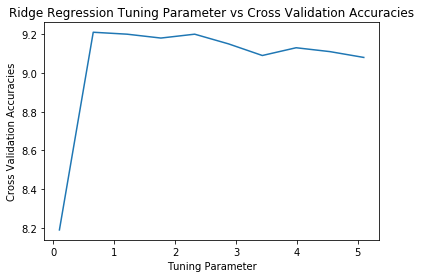

In [0]:
plt.plot(gamma_try, accuracies)
plt.xlabel("Tuning Parameter")
plt.ylabel("Cross Validation Accuracies")
plt.title("Ridge Regression Tuning Parameter vs Cross Validation Accuracies")

In [0]:
### USING ERRORS
# Cross-validation to find ideal gamma using k-out method
n = wholesale_X_sc.shape[0] # getting number of test points
z = 10 # number of test alphas
gamma_try = np.linspace(0.1, 5.1, num=z) # creating set of trial gammas

k = 100 # leave out value
repetitions = 10 # how many times to try validating
errors = np.zeros(len(gamma_try))
for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for j in range(z): # trying each of the gammas
    model = poly_SVM(gamma_try[j], wholesale_X_sc.iloc[[m for m in range(n) if m not in random_indicies]], wholesale_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using gamma_try[j] on wholesale_X, wholesale_Y not at chosen indicies    
    errors[j] += sum(np.square(model.predict([np.array(wholesale_X_sc.iloc[i]) for i in random_indicies]) - np.array([wholesale_Y.iloc[i] for i in random_indicies])))

min_error_ind = np.argmin(errors) 
min_cross_validation_error = min(errors)
print("Minimum Cross Validation Error is: ", min_cross_validation_error)
gamma_star = gamma_try[min_error_ind] # choose gamma with most accuracy
print("Gamma with Minimum Error is: ", gamma_star)

Minimum Cross Validation Error is:  70.0
Gamma with Minimum Error is:  5.1


Text(0.5, 1.0, 'Ridge Regression Tuning Parameter vs Cross Validation Error')

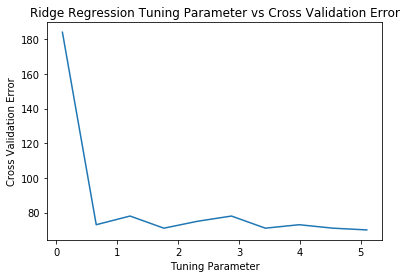

In [0]:
plt.plot(gamma_try, errors)
plt.xlabel("Tuning Parameter")
plt.ylabel("Cross Validation Error")
plt.title("Ridge Regression Tuning Parameter vs Cross Validation Error")

# SVM With Gaussian Kernel

In [0]:
# Function to compute coefficients with ridge regression given a lambda value
def gauss_SVM(gamma_try, wholesale_X_train, wholesale_Y_train):
  gauss_svc = SVC(kernel = 'rbf', gamma = gamma_try)
  gauss_svc_model = gauss_svc.fit(wholesale_X_train, wholesale_Y_train)
  return gauss_svc_model

In [0]:
### USING ERRORS
# Cross-validation to find ideal gamma using k-out method
n = wholesale_X_sc.shape[0] # getting number of test points
z = 10 # number of test alphas
gamma_try = np.linspace(0.1, 5.1, num=z) # creating set of trial gammas

k = 100 # leave out value
repetitions = 10 # how many times to try validating
errors = np.zeros(len(gamma_try))
for r in range(repetitions):
  random_indicies = np.random.permutation(n)[0:k] # choose k to leave out
  for j in range(z): # trying each of the gammas
    model = gauss_SVM(gamma_try[j], wholesale_X_sc.iloc[[m for m in range(n) if m not in random_indicies]], wholesale_Y.iloc[[m for m in range(n) if m not in random_indicies]]) #fit model using gamma_try[j] on wholesale_X, wholesale_Y not at chosen indicies    
    errors[j] += sum(np.square(model.predict([np.array(wholesale_X_sc.iloc[i]) for i in random_indicies]) - np.array([wholesale_Y.iloc[i] for i in random_indicies])))

min_error_ind = np.argmin(errors) 
min_cross_validation_error = min(errors)
print("Minimum Cross Validation Error is: ", min_cross_validation_error)
gamma_star = gamma_try[min_error_ind] # choose gamma with most accuracy
print("Gamma with Minimum Error is: ", gamma_star)

Minimum Cross Validation Error is:  83.0
Gamma with Minimum Error is:  4.544444444444444


Text(0.5, 1.0, 'Ridge Regression Tuning Parameter vs Cross Validation Error')

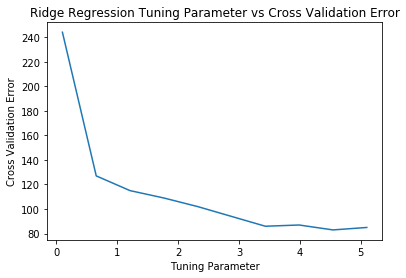

In [0]:
plt.plot(gamma_try, errors)
plt.xlabel("Tuning Parameter")
plt.ylabel("Cross Validation Error")
plt.title("Ridge Regression Tuning Parameter vs Cross Validation Error")